# Clustering - Class work

## Clustering

In [22]:
import numpy as np
import pandas as pd
import plotly_express as px

In [23]:
# Density-based Spatial Clustering of Applications with Noise (DBSCAN)
from sklearn.datasets import make_moons
data, cluster = make_moons(n_samples=200,noise=0.05,random_state=0)
df = pd.DataFrame(data=x, columns=['x','y'])

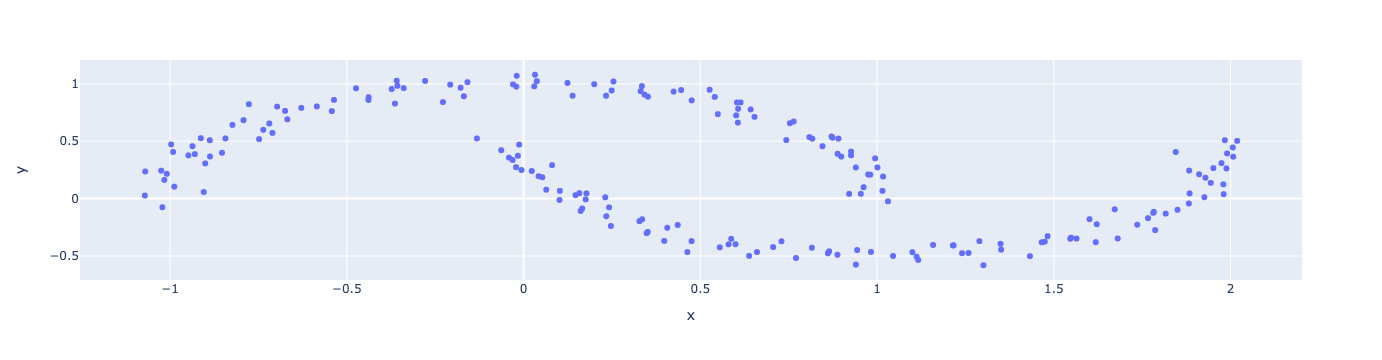

In [24]:
px.scatter(df, x='x', y='y')

Cluster the data using k-means, hierecical clustering (single and complete linkage) and plot the resulted clusters. 